**--> Referências** Pag 73 do Guide v3.7. Observar o significado dos qc1a7 no Guide avançado v3.4 pag 67

# Análise dos dados de Radiância - Fort.207

O arquivo padrão de saída **fort.207** contém informações importantes sobre analises estatísticas dos dados de **radiância**. Este arquivo é dividio em três partes. A primeira parte lista o conteúdo do arquivo *satinfo* (arquivo para controle dos dados de **radiância**), a segunda parte lista os coeficientes para correção de viés após ler o arquivo *satbias_in* e a terceira parte fornece estatísticas detalhadas sobre os dado em três estágios (`it`):

-> *stage o-g 01* (`it = 1`): dados antes do 1º loop externo (*outer loop*);

-> *stage o-g 02* (`it = 2`): dados entre o 1º e o 2º loops externos;

-> *stage o-g 03* (`it = 3`): dados após o 2º loop externo.

A terceira parte do arquivo **fort.207** é subdividida em três seções. Cada seção trás uma tabela, sendo estas caracterizadas da seguinte forma:

-> **Tabela A** (`tab = 0`): sumário para várias estatísticas como uma função do tipo de observação.

*Colunas da tabela:*

`'it', 'sat', 'type', 'penalty', 'nobs', 'iland', 'isnoice', 'icoast', 'ireduce', 'ivarl', 'nlgross', 'qcpenalty', 'qc1', 'qc2', 'qc3', 'qc4', 'qc5', 'qc6', 'qc7'`

-> **Tabela B** (`tab = 1`): sumário para várias estatísticas como uma função do canal.

*Colunas da tabela:*

`'it', 'SN satinfo', 'nchan', 'type', 'sat', 'nobsused', 'nobstossed', 'varCH', 'biasBC', 'biasAC', 'penaltyCH', 'sqrt', 'STD'`

-> **Tabela C** (`tab = 2`): sumário para cada tipo de observação.

*Colunas da tabela:*

`'it', 'sat', 'type', 'read', 'keep', 'assim', 'penalty', 'qcpnlty', 'cpen', 'qccpen'`

## Leitura do arquivo **fort.207**

Neste notebook serão apresentadas as funções criadas na classe `read_diag` para ler e organizar na forma de DataFrames as Tabelas A, B e C disponíveis nos 3 estágios.

1. `fort_207_read(DIRdiag, dates):` esta função lê todas as linhas do arquivo **fort.207** identifica as tabelas A, B e C, organiza as informações dos 3 estágios (`it`) no mesmo dataframe. No final a função concatena as tabelas formando uma lista bidimensional de tabelas com relação ao tempo (range de datas) e tipo de tabela (`tab`). Abaixo você pode visualizar um exemplo das três tabelas no date = `'2024030100'` do EXP21.

   -> **Tabela A** - `tab = 0`:
   
   <img src=notefigs/Fort207_TableA_tab0.png style="width: 800px;">
   <br>

   -> **Tabela B** - `tab = 1`:
   
   <img src=notefigs/Fort207_TableB_tab1.png style="width: 800px;">
   <br>

   -> **Tabela C** - `tab = 2`:
   
   <img src=notefigs/Fort207_TableC_tab2.png style="width: 600px;">
   <br>


## Importa as bibliotecas utilizadas no readDiag

In [1]:
import gsidiag as gd

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from gsidiag.datasources import getVarInfo # NEW !!!!

%matplotlib inline

## Leitura dos arquivos

Realiza o processo de leitura do arquivo **fort.207** a partir dos dados iniciais fornecidos pelo usuário.

In [2]:
# Rodada do Experimento 19 (Fazer 1ª rodada para FEV e 2ª rodada para MAR)
# DIRdiag = '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout'
# Rodada do Experimento 20 (Fazer rodada para FEV)
# DIRdiag = '/home/radiancia/Exp_SMNA/data/EXP20/gsi_dataout'
# Rodada do Experimento 21 (Fazer rodada para MAR)
DIRdiag = '/home/radiancia/Exp_SMNA/data/EXP21/gsi_dataout'
EXP19 = True
EXP20 = False
EXP21 = False

#varType = 'n19' #['n15', 'n18', 'n19']#, 'metop-b']
#varName = 'amsua' #'hirs4' #'amsua'
dateIni = '2024030100' 
dateFin = '2024030518' 
nHour = '06'          

datei = datetime.strptime(str(dateIni), '%Y%m%d%H')
datef = datetime.strptime(str(dateFin), '%Y%m%d%H')
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq='6H').tolist()]

print(dates)
print('')
    
# Leitura dos arquivos de diagnósticos
read = False
    
# Finalizando: liberando memória arquivos de diagnóstico
if read:
    for file in gdf_list:
        if file._FNumber != None:
            file.close()


['2024030100', '2024030106', '2024030112', '2024030118', '2024030200', '2024030206', '2024030212', '2024030218', '2024030300', '2024030306', '2024030312', '2024030318', '2024030400', '2024030406', '2024030412', '2024030418', '2024030500', '2024030506', '2024030512', '2024030518']



Leitura e construção das tabelas. Concatena o range de tabelas na variável `Self`.

In [3]:
print('')
print('>>>> Leitura: fort_207_read <<<<')
print('')
Self = gd.read_diag.fort_207_read(DIRdiag, dates)


>>>> Leitura: fort_207_read <<<<

DIRdiag =  /home/radiancia/Exp_SMNA/data/EXP21/gsi_dataout

TABLE A: Names columns A =  ['it', 'sat', 'type', 'penalty', 'nobs', 'iland', 'isnoice', 'icoast', 'ireduce', 'ivarl', 'nlgross', 'qcpenalty', 'qc1', 'qc2', 'qc3', 'qc4', 'qc5', 'qc6', 'qc7']

TABLE B: Names columns B =  ['it', 'SN satinfo', 'nchan', 'type', 'sat', 'nobsused', 'nobstossed', 'varCH', 'biasBC', 'biasAC', 'penaltyCH', 'sqrt', 'STD']

TABLE C: Names columns C =  ['it', 'sat', 'type', 'read', 'keep', 'assim', 'penalty', 'qcpnlty', 'cpen', 'qccpen']

['/home/radiancia/Exp_SMNA/data/EXP21/gsi_dataout/2024030100/fort.207', '/home/radiancia/Exp_SMNA/data/EXP21/gsi_dataout/2024030106/fort.207', '/home/radiancia/Exp_SMNA/data/EXP21/gsi_dataout/2024030112/fort.207', '/home/radiancia/Exp_SMNA/data/EXP21/gsi_dataout/2024030118/fort.207', '/home/radiancia/Exp_SMNA/data/EXP21/gsi_dataout/2024030200/fort.207', '/home/radiancia/Exp_SMNA/data/EXP21/gsi_dataout/2024030206/fort.207', '/home/radia

Abaixo segue um exemplo para visualização a Tabela A (`tab = 0`).

In [4]:
tidx = 0
tab = 0
Self[tidx][tab]

,it,sat,type,penalty,nobs,iland,isnoice,icoast,ireduce,ivarl,nlgross,qcpenalty,qc1,qc2,qc3,qc4,qc5,qc6,qc7
0,1,n15,amsua,38637.231417,8583,8066,396,121,2687,17369,0,38637.231417,1248,75,7192,527,74,0,0
1,1,n18,amsua,64181.464177,9076,8511,448,117,2987,3813,0,64181.464177,5499,238,3123,361,0,0,0
2,1,n19,hirs4,0.000000,9330,8800,525,5,3031,20099,0,0.000000,396,0,30684,79980,0,0,0
3,1,n19,amsua,62841.750122,9217,8658,433,126,2971,6499,0,62841.750122,6019,262,2786,386,14,0,0
4,1,metop-b,amsua,66132.389811,9033,8472,522,39,2930,1604,0,66132.389811,0,0,0,376,1,0,0
5,2,n15,amsua,15337.411502,8583,8066,396,121,2687,17255,0,15337.411502,1356,66,7099,527,74,0,0
6,2,n18,amsua,32960.036424,9076,8511,448,117,2987,1063,0,32960.036424,7385,375,1052,361,0,0,0
7,2,n19,hirs4,0.000000,9330,8800,525,5,3031,18780,0,0.000000,396,0,30993,80485,0,0,0
8,2,n19,amsua,24207.073446,9217,8658,433,126,2971,5252,0,24207.073446,7646,334,1060,386,14,0,0
9,2,metop-b,amsua,24652.611498,9033,8472,522,39,2930,205,0,24652.611498,0,0,0,376,1,0,0


Exemplo Tabela B (`tab = 1`).

In [5]:
tidx = 0
tab = 1
Self[tidx][tab]

,it,SN satinfo,nchan,type,sat,nobsused,nobstossed,varCH,biasBC,biasAC,penaltyCH,sqrt,STD
0,1,1,1,amsua,n15,7,0,3.00,-1.466196,0.524999,0.043791,2.025449,1.956226
1,1,2,2,amsua,n15,7,0,2.20,-1.007275,-0.490172,0.021673,1.573250,1.494941
2,1,3,3,amsua,n15,7,0,2.00,2.680983,-1.029954,0.047610,1.510012,1.104233
3,1,4,4,amsua,n15,7,0,0.60,1.868976,0.021565,0.029454,0.349475,0.348809
4,1,5,5,amsua,n15,7,0,0.30,0.789513,0.196218,0.062891,0.305445,0.234084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,3,2544,10,amsua,metop-b,9032,1,0.35,0.067928,0.011628,0.362831,0.210826,0.210505
200,3,2545,11,amsua,metop-b,9031,2,0.40,0.102970,0.018301,0.366890,0.242296,0.241604
201,3,2546,12,amsua,metop-b,8979,54,0.55,0.178487,0.032255,0.399844,0.347848,0.346349
202,3,2547,13,amsua,metop-b,9010,23,0.80,0.261067,0.058701,0.346532,0.471372,0.467703


Exemplo Tabela C (`tab = 2`).

In [6]:
tidx = 0
tab = 2
Self[tidx][tab]

,it,sat,type,read,keep,assim,penalty,qcpnlty,cpen,qccpen
0,o-g 01 rad,n17,hirs3,0,0,0,0.0,0.0,0.0,0.0
1,o-g 01 rad,metop-a,hirs4,0,0,0,0.0,0.0,0.0,0.0
2,o-g 01 rad,g11,goes_img,0,0,0,0.0,0.0,0.0,0.0
3,o-g 01 rad,g12,goes_img,0,0,0,0.0,0.0,0.0,0.0
4,o-g 01 rad,aqua,airs,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
133,o-g 03 rad,npp,atms,0,0,0,0.0,0.0,0.0,0.0
134,o-g 03 rad,n20,atms,0,0,0,0.0,0.0,0.0,0.0
135,o-g 03 rad,npp,cris,0,0,0,0.0,0.0,0.0,0.0
136,o-g 03 rad,npp,cris-fsr,0,0,0,0.0,0.0,0.0,0.0


A instrução **pandas.IndexSlice** pode ser utilizada para trabalhar com os multi-índices das tabelas. A seguir um exemplos, utilizando a instrução `.loc` com `pd.IndexSlice` do pandas.

In [7]:
idx = pd.IndexSlice
tidx = 0
print('data = ',dates[tidx])
tab = 0

Self[tidx][tab].loc[idx[:], idx['sat':'nobs']]

data =  2024030100


,sat,type,penalty,nobs
0,n15,amsua,38637.231417,8583
1,n18,amsua,64181.464177,9076
2,n19,hirs4,0.000000,9330
3,n19,amsua,62841.750122,9217
4,metop-b,amsua,66132.389811,9033
5,n15,amsua,15337.411502,8583
6,n18,amsua,32960.036424,9076
7,n19,hirs4,0.000000,9330
8,n19,amsua,24207.073446,9217
9,metop-b,amsua,24652.611498,9033


Utilizando `mask` para trabalhar com os dados. Abaixo um exemplo para visualizar os dados da Tabela B (`tab=1`) do satélite `'n19'`, sensor `'amsua'` no estágio 3 (`it = 3`).

In [8]:
idx = pd.IndexSlice
tidx = 0
print('data = ',dates[tidx])
tab = 1

mask = "(sat == 'n19' & type == 'amsua') and it == 3"
Self[tidx][tab].query(mask)

data =  2024030100


,it,SN satinfo,nchan,type,sat,nobsused,nobstossed,varCH,biasBC,biasAC,penaltyCH,sqrt,STD
181,3,1310,1,amsua,n19,173,4,2.50,-1.291502,-0.243553,0.047356,1.578102,1.559194
182,3,1311,2,amsua,n19,175,0,2.20,-1.347534,-0.232055,0.047241,1.590227,1.573205
183,3,1312,3,amsua,n19,175,0,2.00,1.074523,-0.045223,0.042064,1.143530,1.142635
184,3,1313,4,amsua,n19,175,0,0.55,0.174951,-0.064341,0.023566,0.356583,0.350730
185,3,1314,5,amsua,n19,175,7,0.30,-0.688100,-0.057429,0.082893,0.277861,0.271862
186,3,1315,6,amsua,n19,8474,8,0.23,-0.906306,-0.016063,0.467666,0.174504,0.173763
187,3,1316,7,amsua,n19,8756,461,-0.23,-1.081586,0.115483,1.649195,0.298300,0.275039
188,3,1317,8,amsua,n19,4392,4825,-0.25,0.154102,0.028087,2.546014,0.398975,0.397985
189,3,1318,9,amsua,n19,9216,1,0.25,-0.426717,-0.014139,0.427173,0.163397,0.162784
190,3,1319,10,amsua,n19,9216,1,0.35,-0.201580,-0.005228,0.371297,0.213271,0.213207


## Plote fort.207

A seguir é apresentada uma função elaborada na classe **plot_diag** do readDiag para visualização e análise das informações presentes na Tabela B do arquivo **fort.207**.

1. `time_series_fort207(self, Type=None, Sat=None, it=None, dateIni=None, dateFin=None, nHour="06", mask=None, channel=None, Clean=None):` esta função fornece gráficos e diagramas (a depender dos valores da variável `channel`) das estatíticas disponíveis na Tabela B (`tab = 1`).  Caso o usuário faça `channel = None`, seis diagramas referentes as variáveis `nobsused` (nº de obs utilizadas), `nobstossed` (nº de obs descartadas), `biasBC` (obs - guess antes da correção de viés), `biasAC` (obs - guess após a correção de viés), `penaltCH` (penalidade do canal) e `STD` (desvio padrão) são gerados, sendo no eixo vertical a indicação dos canais e no eixo horizontal a indicação do tempo (date). O usuário também pode gerar os seis diagramas considerando uma lista de canais pré-definida na forma de um array (exemplo: `channel = [1, 2, 3, 5]`). Uma última opção é gerar dois gráficos, onde o 1º contém os valores de `biasBC`, `biasAC` e o desvio padrão `STD` e o segundo gráfico contém os valores de `nobsused` e `nobstossed`, ambos quando `channel` recebe um valor específico de canal (exemplo: `channel = 13`). Observe que previamente é necessário estabelecer o tipo de sensor (`Type`), o satélite (`Sat`) e o estágio `it`. Além disso, é necessário definir a máscara `mask` em concordância com o sensor e satélite estabelecidos.

Abaixo segue um exemplo para `channel = None`.


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 0

mask =  (sat == 'n19' & type == 'amsua')

Stage it:  3

Table:  1

 Preparing data for: channels2024-03-01:00
 channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: channels2024-03-01:06
 channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: channels2024-03-01:12
 channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: channels2024-03-01:18
 channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: channels2024-03-02:00
 channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: channels2024-03-02:06
 channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: channels2024-03-02:12
 channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing data for: channels2024-03-02:18
 channels:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

 Preparing da

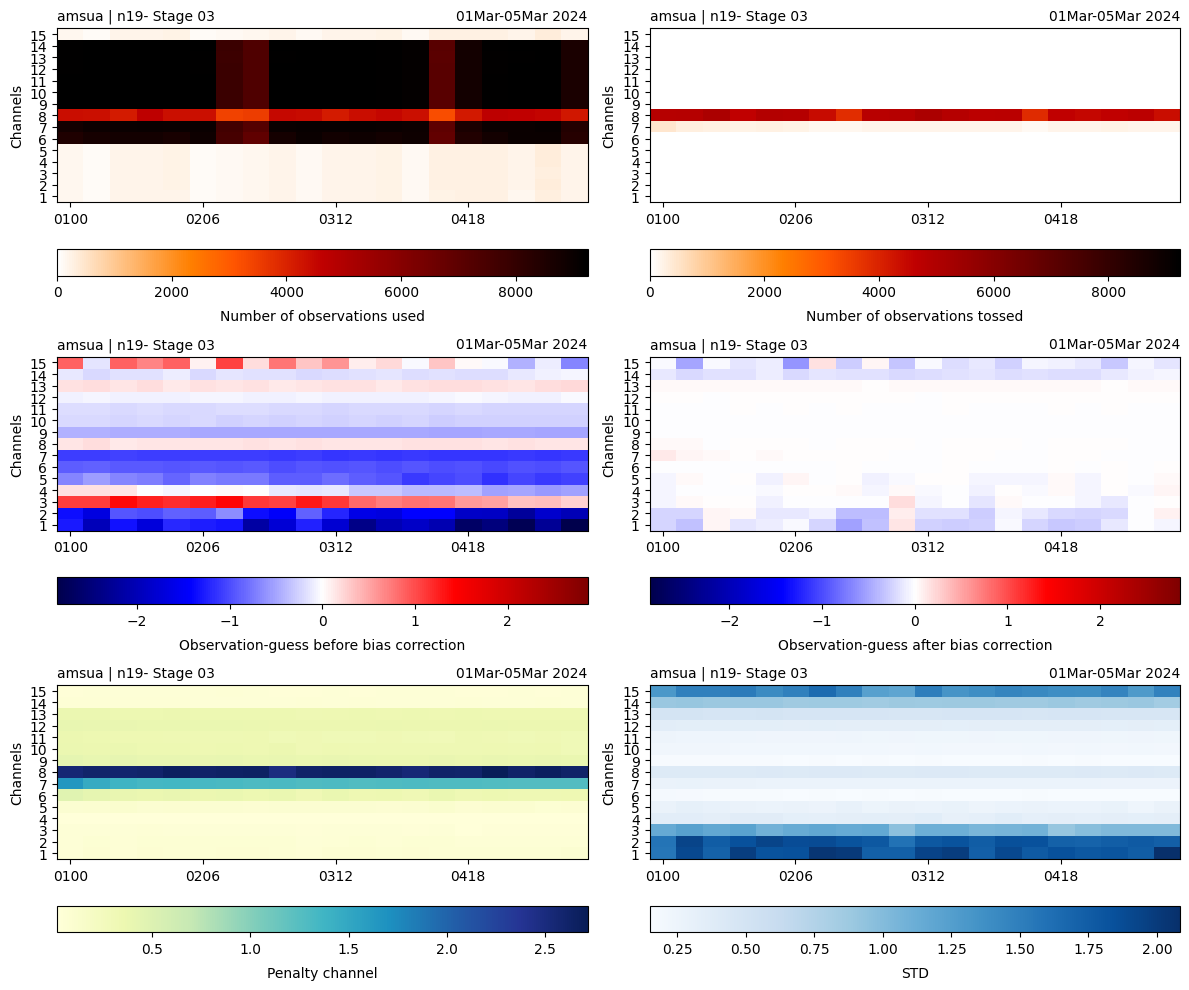

In [9]:
# mask = "(sat == 'n19' & type == 'hirs4')"
mask = "(sat == 'n19' & type == 'amsua')"
# mask = "(sat == 'n15' & type == 'amsua')"

channel = None
gd.plot_diag.time_series_fort207(Self, Type='amsua', 
                                 Sat='n19', 
                                 it=3, 
                                 dateIni=dateIni, 
                                 dateFin=dateFin, 
                                 nHour=nHour, 
                                 mask=mask, 
                                 channel=channel, 
                                 Clean=False)


Exemplo para quando `channel` é uma lista, no caso `channel = [1, 2, 3, 5]`.



[1, 2, 3, 4, 5] 1

mask =  (sat == 'n19' & type == 'amsua')

Stage it:  3

Table:  1

 Preparing data for: channels2024-03-01:00
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-01:06
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-01:12
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-01:18
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-02:00
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-02:06
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-02:12
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-02:18
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-03:00
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-03:06
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-03:12
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-03:18
 channels:  [1, 2, 3, 4, 5]

 Preparing data for: channels2024-03-04:00
 chann

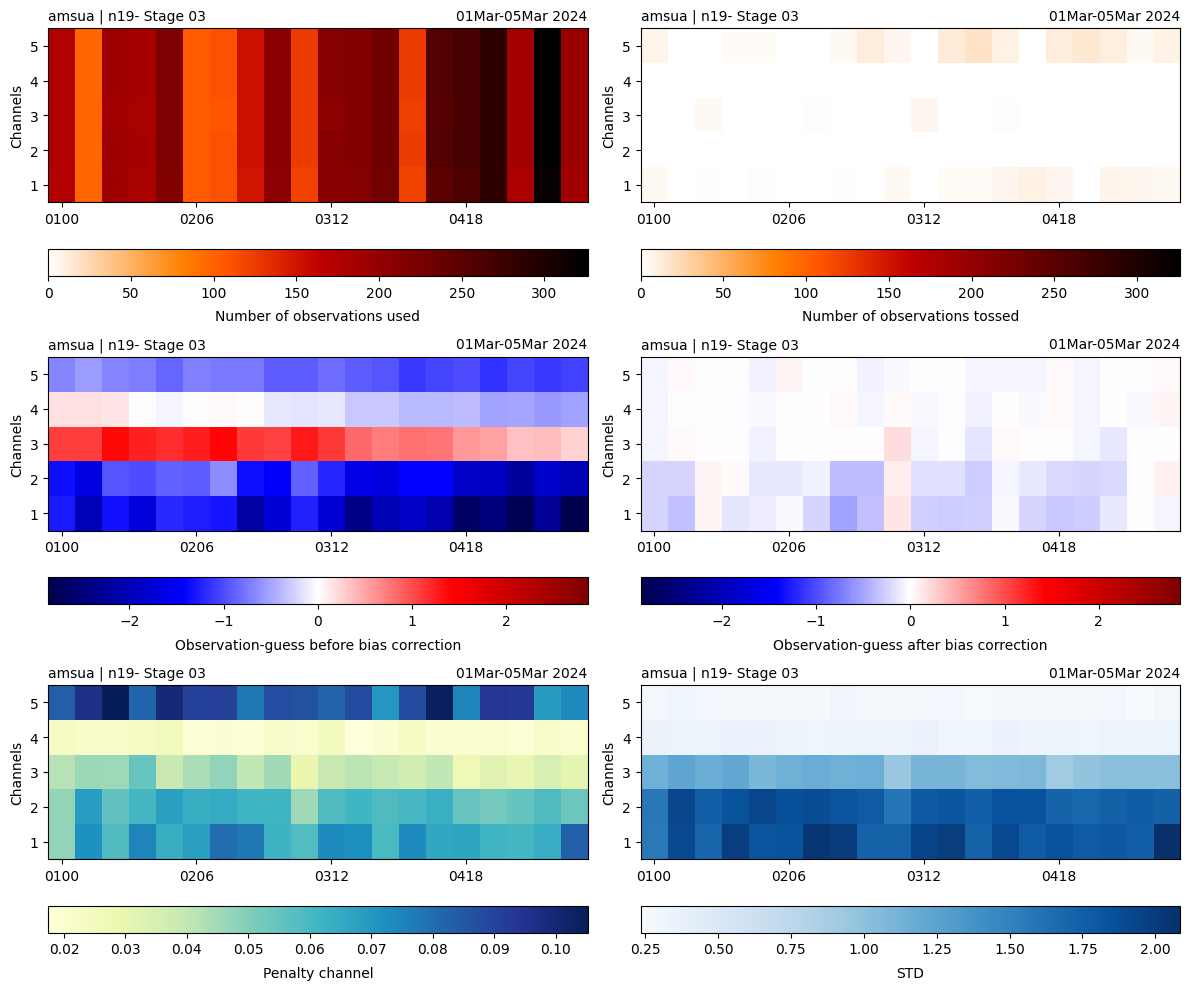

In [10]:
mask = "(sat == 'n19' & type == 'amsua')"

channel = [1, 2, 3, 4, 5]
gd.plot_diag.time_series_fort207(Self, Type='amsua', 
                                 Sat='n19', 
                                 it=3, 
                                 dateIni=dateIni, 
                                 dateFin=dateFin, 
                                 nHour=nHour, 
                                 mask=mask, 
                                 channel=channel, 
                                 Clean=False)


Exemplo para quando `channel` recebe umm valor. Abaixo `channel = 13`.



13 0

mask =  (sat == 'n19' & type == 'amsua')

Stage it:  3

Table:  1

 Preparing data for: 2024-03-01:00  - channel:  13
 Preparing data for: 2024-03-01:06  - channel:  13
 Preparing data for: 2024-03-01:12  - channel:  13
 Preparing data for: 2024-03-01:18  - channel:  13
 Preparing data for: 2024-03-02:00  - channel:  13
 Preparing data for: 2024-03-02:06  - channel:  13
 Preparing data for: 2024-03-02:12  - channel:  13
 Preparing data for: 2024-03-02:18  - channel:  13
 Preparing data for: 2024-03-03:00  - channel:  13
 Preparing data for: 2024-03-03:06  - channel:  13
 Preparing data for: 2024-03-03:12  - channel:  13
 Preparing data for: 2024-03-03:18  - channel:  13
 Preparing data for: 2024-03-04:00  - channel:  13
 Preparing data for: 2024-03-04:06  - channel:  13
 Preparing data for: 2024-03-04:12  - channel:  13
 Preparing data for: 2024-03-04:18  - channel:  13
 Preparing data for: 2024-03-05:00  - channel:  13
 Preparing data for: 2024-03-05:06  - channel:  13
 Prepari

<Figure size 800x400 with 0 Axes>

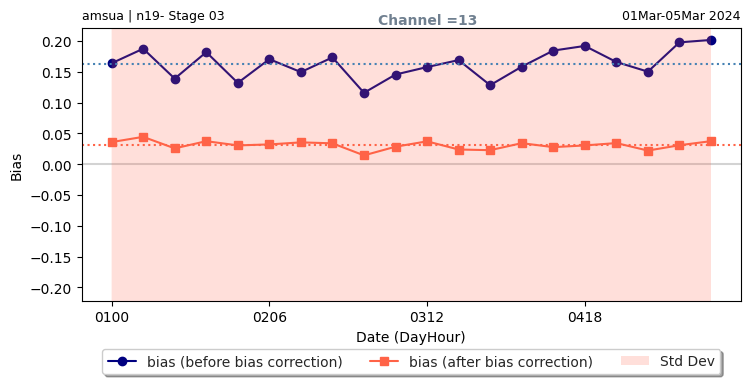

<Figure size 700x400 with 0 Axes>

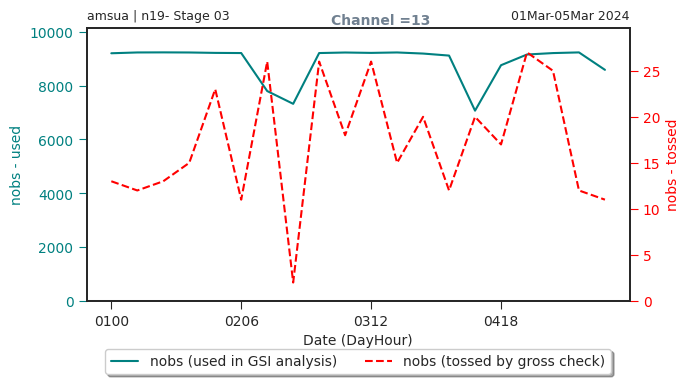

In [11]:
mask = "(sat == 'n19' & type == 'amsua')"

channel = 13
gd.plot_diag.time_series_fort207(Self, Type='amsua', 
                                 Sat='n19', 
                                 it=3, 
                                 dateIni=dateIni, 
                                 dateFin=dateFin, 
                                 nHour=nHour, 
                                 mask=mask, 
                                 channel=channel, 
                                 Clean=False)